# Hypothesis Testing Exercise

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

Is the website redesign any good?
Is our television ad driving more sales?
Has the network latency gone up since we switched internet service providers?

**Is the website redesign any good?**

H0: The current website design does not affect the Average Session Duration of visitors. 

H1: The current website design affects the Average Session Duration of visitors

**Is our television ad driving more sales?**

H0: Our television ad does not increase our previous year sales by at least 10%.

H1: Our television ad increase our previous year sales by at least 10%.

**Has the network latency gone up since we switched internet service providers?**

H0: The new internet service provider does not slow down the internet.

H1: The new internet service provider does slow down the internet.

# T-test Exercise

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [55]:
from scipy import stats

In [14]:
office_one_dist = stats.norm(90,15).rvs(40)
office_two_dist = stats.norm(100,20).rvs(50)

In [26]:
t, p_value = stats.ttest_ind(office_one_dist, office_two_dist)

p_value < .05

True

**There is a difference in the average time it takes office 1 and office 2 to sell homes.**

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [206]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt

mpg = data('mpg')

In [207]:
mpg["avg_mpg"] = mpg[["cty", "hwy"]].mean(axis=1) #get the average mpg of hwy and cty
mpg[mpg.year == "2008" or "1999"]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**Is there a linear relationship between engine displacement (displ) and city mileage (cty)?**

In [56]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [35]:
x = mpg.displ
y = mpg.cty

In [36]:
r, p = stats.pearsonr(x,y)

In [42]:
print("r is",r)
print("p-value is",p)

r is -0.7985239689348551
p-value is 4.737914890205637e-53


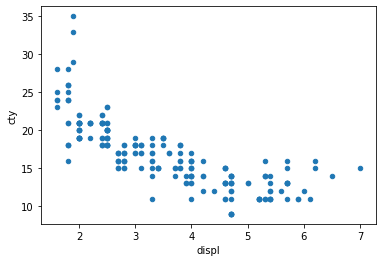

In [50]:
mpg.plot.scatter(x='displ', y='cty')
plt.show()

**Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?**

In [37]:
from env import host, user, password
import math

In [72]:
def get_db_url(u,p,h,d):
    url = f'mysql+pymysql://{u}:{p}@{h}/{d}'
    return url

In [73]:
host = host
user = user
password = password

In [46]:
telco = get_db_url(user,password,host,"telco_churn")
telco = pd.read_sql('SELECT * FROM customers', telco)
telco.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No


In [50]:
telco.total_charges = pd.to_numeric(telco.total_charges, errors='coerce')

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
dtype: object

In [56]:
r, p_value = stats.pearsonr(telco.tenure, telco.monthly_charges)

In [57]:
print("r is",r)
print("p-value is",p_value)

r is 0.24789985628615013
p-value is 4.0940449915016345e-99


In [67]:
has_phone = telco[telco.phone_service == "Yes"].monthly_charges
t, p_value = stats.ttest_1samp(has_phone, telco.monthly_charges.mean())

In [68]:
print("t is",t)
print("p-value is",p_value)

t is 6.384085361213779
p-value is 1.8459050416917347e-10


In [69]:
has_phone = telco[telco.phone_service == "No"].monthly_charges
t, p_value = stats.ttest_1samp(has_phone, telco.monthly_charges.mean())

In [70]:
print("t is",t)
print("p-value is",p_value)

t is -51.98769144005506
p-value is 2.8948973193670954e-239


tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
phone_service,,,,,,,,,,,,,,,,,,,,,
No,2,58,20,28,19,13,9,15,9,12,...,4,5,3,9,9,11,10,14,12,31
Yes,9,555,218,172,157,120,101,116,114,107,...,68,75,73,80,89,89,85,105,158,331


**Use the employees database.**
- **Is there a relationship between how long an employee has been with the company and their salary?**
- **Is there a relationship between how long an employee has been with the company and the number of titles they have had?**

In [112]:
import numpy as np
emp = get_db_url(user,password,host,"employees")

In [113]:
emp = pd.read_sql(
"""
SELECT e.emp_no, e.hire_date, s.salary, t.title, s.to_date
FROM employees as e
JOIN salaries as s
USING(emp_no)
JOIN titles as t
USING(emp_no)
WHERE s.to_date = "9999-01-01"
""", emp)

In [166]:
emp.head(10)

,emp_no,hire_date,salary,title,to_date,tenure
0,10001,1986-06-26,88958,Senior Engineer,2019-10-08 15:10:16.220486,12157
1,10002,1985-11-21,72527,Staff,2019-10-08 15:10:16.220486,12374
2,10003,1986-08-28,43311,Senior Engineer,2019-10-08 15:10:16.220486,12094
3,10004,1986-12-01,74057,Engineer,2019-10-08 15:10:16.220486,11999
4,10004,1986-12-01,74057,Senior Engineer,2019-10-08 15:10:16.220486,11999
5,10005,1989-09-12,94692,Senior Staff,2019-10-08 15:10:16.220486,10983
6,10005,1989-09-12,94692,Staff,2019-10-08 15:10:16.220486,10983
7,10006,1989-06-02,59755,Senior Engineer,2019-10-08 15:10:16.220486,11085
8,10007,1989-02-10,88070,Senior Staff,2019-10-08 15:10:16.220486,11197
9,10007,1989-02-10,88070,Staff,2019-10-08 15:10:16.220486,11197


In [128]:
emp.dtypes

emp_no                int64
hire_date    datetime64[ns]
salary                int64
title                object
to_date      datetime64[ns]
tenure                int64
dtype: object

In [116]:
emp.hire_date = pd.to_datetime(emp.hire_date)

In [121]:
emp.to_date = pd.to_datetime("now")

In [127]:
emp["tenure"] = emp.to_date - emp.hire_date
emp.tenure = emp.tenure / np.timedelta64(1, "D")
emp.tenure = emp.tenure.astype(int)

In [130]:
r, p_value = stats.pearsonr(emp.tenure, emp.salary)

In [131]:
print(f"""
r is: {r}
p-value is: {p_value}
""")


r is: 0.30728190932146726
p-value is: 0.0



In [172]:
emp_title_grp = emp.groupby(emp.emp_no).count().title
# emp_grouped = emp.groupby(emp.emp_no).count()



In [179]:
emp_tenure_grp = emp.drop_duplicates(subset="emp_no",keep="first").tenure

240124

In [180]:
r, p_value = stats.pearsonr(emp_title_grp, emp_tenure_grp)

In [181]:
print(f"""
r is: {r}
p-value is: {p_value}
""")


r is: 0.28712678896997174
p-value is: 0.0



**Use the sleepstudy data. Is there a relationship between days and reaction time?**

In [188]:
from pydataset import data

sleep = data('sleepstudy',show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

AttributeError: 'str' object has no attribute 'head'

In [190]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [191]:
r, p_value = stats.pearsonr(sleep["Reaction"],sleep["Days"])

In [192]:
print(f"""
r is: {r}
p-value is: {p_value}
""")


r is: 0.5352302262650254
p-value is: 9.89409632221453e-15



**Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.**

In [195]:
index = ["Uses a Macbook", "Doesn't Use a Macbook"]
columns = ["Codeup Student", "Not a Codeup Student"]

observed_mac = pd.DataFrame([[49,20], [1,30]], index=index, columns=columns)
n = observed.values.sum()

In [196]:
observed_mac

,Codeup Student,Not a Codeup Student
Uses a Macbook,49,20
Doesn't Use a Macbook,1,30


In [197]:
chi2, p, degf, expected = stats.chi2_contingency(observed_mac)

In [226]:
print(f"""
chi2: {chi2}
p-value: {p}

With p-value < 0.05, Macbook use is dependent of Codeup enrollment, i.e., Codeup students are more disposed to using a Mac.
""")


chi2: 464.37214690582
p-value: 5.267718408816259e-54

With p-value < 0.05, Macbook use is dependent of Codeup enrollment, i.e., Codeup students are more disposed to using a Mac.



**Choose another 2 categorical variables from the mpg dataset and perform a 
$\chi2$ contingency table test with them. Be sure to state your null and alternative hypotheses.**

In [212]:
mpg2 = data("mpg")

- H0: Class is independent of Manufacturer
- H1: Class is dependent to the Manufacturer

In [216]:
mpg_ctab = pd.crosstab(mpg2["manufacturer"], mpg2["class"])

In [218]:
chi2, p, degf, expected = stats.chi2_contingency(mpg_ctab)

In [223]:
print(f"""
chi2: {chi2}
p-value: {p}

with p-value < 0.05, it can be inferred that Class is Dependent of Manufacturer, i.e., manufacturers are more disposed to producing certain class of vehicles.
""")


chi2: 464.37214690582
p-value: 5.267718408816259e-54

with p-value < 0.05, it can be inferred that Class is Dependent of Manufacturer, i.e., manufacturers are more disposed to producing certain class of vehicles.



**Use the data from the employees database to answer these questions:**

- **Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees?)**
- **Is an employee's gender independent of whether or not they are or have been a manager?**

In [229]:
emp = get_db_url(user,password,host,"employees")
emp = pd.read_sql(
"""
SELECT e.emp_no, e.gender, ewd.dept_name
FROM employees as e
JOIN employees_with_departments as ewd
USING(emp_no)
JOIN dept_emp as de
USING(emp_no)
WHERE de.to_date = "9999-01-01"
""", emp)

In [230]:
emp.head()

,emp_no,gender,dept_name
0,10038,M,Customer Service
1,10049,F,Customer Service
2,10060,M,Customer Service
3,10088,F,Customer Service
4,10112,F,Customer Service


In [233]:
iso_marketingsales = emp[(emp.dept_name == "Sales")|(emp.dept_name == "Marketing")]

In [237]:
emp_ctab_dept = pd.crosstab(iso_marketingsales.gender, iso_marketingsales.dept_name)

In [238]:
emp_ctab_dept

dept_name,Marketing,Sales
gender,,
F,6429,16698
M,9823,25302


In [239]:
chi2, p, degf, expected = stats.chi2_contingency(emp_ctab_dept)

In [241]:
print(f"""
chi-square: {chi2}
p-vale: {p}

Gender and Department (Marketing and Sales) are independent of each other. In other words, the gender of the employee does not predispose him/her to belong in either the marketing or sales departments
""")


chi-square: 0.18548924445258216
p-vale: 0.6666977011651685

Gender and Department (Marketing and Sales) are independent of each other. In other words, the gender of the employee does not predispose him/her to belong in either the marketing or sales departments



In [242]:
emp3 = get_db_url(user,password,host,"employees")
emp3 = pd.read_sql(
"""
SELECT e.gender, e.emp_no, dm.dept_no
FROM employees as e
JOIN dept_manager as dm
USING(emp_no)
""", emp3)

In [243]:
emp3.head()

,gender,emp_no,dept_no
0,M,110022,d001
1,M,110039,d001
2,M,110085,d002
3,F,110114,d002
4,F,110183,d003


In [244]:
emp_ctab_manager = pd.crosstab(emp3.gender, emp3.dept_no)

In [246]:
chi2, p, degf, expected = stats.chi2_contingency(emp_ctab_manager)

In [248]:
print(f"""
chi-square: {chi2}
p-value: {p}

With p-value > 0.05, it can be inferred that Gender and Being a Manager is independent of each other. In other words, being a male or female does not pre-dispose you to become a manager.
""")


chi-square: 7.888111888111889
p-value: 0.4444754330422406

With p-value > 0.05, it can be inferred that Gender and Being a Manager is independent of each other. In other words, being a male or female does not pre-dispose you to become a manager.

